# MONDRIAN TREE: APPLICATION TO 2D MOONS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt

import Mondrian
import Plot

## moons dataset:

In [3]:
moons = datasets.make_moons(n_samples=50,noise=0.05,random_state=0)
X = moons[0] # data
y = moons[1] # true labels

df_moons = {'X1':X[:,0],'X2':X[:,1],'y':y}
df_moons = pd.DataFrame(df_moons)
df_moons.head()

,X1,X2,y
0,0.056181,0.075957,1
1,0.109739,0.965219,0
2,0.299474,0.954463,0
3,1.608086,-0.413872,1
4,0.969291,0.269144,0


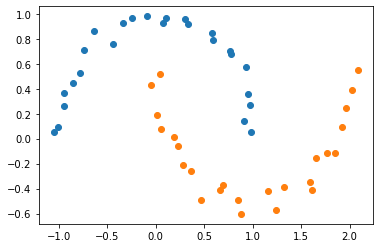

In [4]:
fig,ax = plt.subplots()
ax.scatter(df_moons.query('y==0')['X1'],df_moons.query('y==0')['X2'])
ax.scatter(df_moons.query('y==1')['X1'],df_moons.query('y==1')['X2'])

In [5]:
import Matrix
data_index,cut_matrix,point_cut_distance = Matrix.cut_ensemble(X)

*data_index* stores the indexed data. *cut_matrix* stores the indexed cutting hyperplane for each pair of samples. *point_cut_distance* stores the distances between hyperplanes and samples.

In [6]:
data_index.head()

,0,1,index
0,0.056181,0.075957,0
1,0.109739,0.965219,1
2,0.299474,0.954463,2
3,1.608086,-0.413872,3
4,0.969291,0.269144,4


In [7]:
print('number of hyperplanes: ',len(cut_matrix))
cut_matrix.head()

number of hyperplanes:  1225


,index1,index2,cut_index,magnitude_norm_vect,norm_vect_0,norm_vect_1
0,1,0,0,0.524634,0.060118,0.998191
1,2,0,1,0.543982,0.266894,0.963726
2,2,1,2,0.149953,0.998397,-0.056598
3,3,0,3,0.844399,0.953626,-0.300994
4,3,1,4,0.445280,0.735781,-0.677219


In [8]:
print('number of rows = number of samples = ',len(point_cut_distance))
print('number of columns = number of hyperplanes + 1 = ',len(point_cut_distance.columns))
point_cut_distance.head()

number of rows = number of samples =  50
number of columns = number of hyperplanes + 1 =  1226


,cut_index_0,cut_index_1,cut_index_2,cut_index_3,cut_index_4,cut_index_5,cut_index_6,cut_index_7,cut_index_8,cut_index_9,...,cut_index_1216,cut_index_1217,cut_index_1218,cut_index_1219,cut_index_1220,cut_index_1221,cut_index_1222,cut_index_1223,cut_index_1224,point_index
0,-0.445437,-0.455786,-0.098161,-0.813686,-0.455382,-0.479934,-0.466661,-0.035005,-0.020936,0.950213,...,-1.013173,-0.337667,-0.390842,-0.614420,-0.813366,1.039080,-1.105334,-1.312520,0.873483,0
1,0.445437,0.415513,-0.095020,-1.030274,-1.018201,-1.085590,-0.230196,-0.553026,-0.619456,1.563107,...,-0.627964,-0.439196,-0.555448,-1.092177,-0.188975,0.308119,-1.501432,-1.446149,0.071168,1
2,0.446107,0.455786,0.095020,-0.846100,-0.871314,-0.946679,-0.046797,-0.398807,-0.479144,1.425649,...,-0.456319,-0.250472,-0.368806,-0.932136,-0.052953,0.198934,-1.331508,-1.258361,-0.012039,2
3,-0.841082,-0.513654,1.478980,0.813686,1.018201,0.946679,0.950245,1.479301,1.414102,-0.467592,...,0.239102,1.275684,1.233627,0.930113,0.035288,0.461335,0.484513,0.307512,0.543662,3
4,-0.197705,-0.025904,0.802551,-0.001068,0.085637,0.011553,0.466661,0.553026,0.479144,0.467592,...,-0.094679,0.528082,0.447736,0.012232,0.002109,0.321422,-0.409471,-0.460015,0.259247,4


## MONDRIAN CLUSTERING TREE

In [9]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [10]:
part,m,list_p,list_m_leaf = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

PARTITIONING:
total number of splits: 19
MERGING:
range of possible number of clusters: 1-16


### OUTCOME OF THE PARTITIONING PHASE:

*part* is a dataframe. Each row corresponds to a polytope that has been created during the hierarchical splitting. Each polytope is associated to its creation time, its characterization number, the characterization number of the father, the boolean information of being a leaf, the polytope object created by the Polytope package.

In [11]:
print('total number of polytopes: ',len(part))
part.head()

total number of polytopes:  39


,time,father,part_number,leaf,polytope
0,0.000000,nan,0,False,Single polytope \n [[ 1. 0.] | [[2.24468]...
1,0.664801,0,1,False,Single polytope \n [[ 1. 0. ] | ...
2,0.664801,0,2,False,Single polytope \n [[-1. 0. ] | ...
3,0.728402,1,3,False,Single polytope \n [[ 0. 1. ] | ...
4,0.728402,1,4,False,Single polytope \n [[ 1. 0. ] | ...


*m* is a list of dataframes. Each dataframe corresponds to a polytope of the *part* dataframe and stores the indexed samples contained in it.

In [12]:
print('number of elements of the list: ',len(m))
m[0].head()

number of elements of the list:  39


,0,1,index
0,0.056181,0.075957,0
1,0.109739,0.965219,1
2,0.299474,0.954463,2
3,1.608086,-0.413872,3
4,0.969291,0.269144,4


### OUTCOME OF THE MERGING PHASE: 

*list_p* is a list of dataframes. Each dataframe describes a configuration of the space division during the merging procedure. Each row corresponds to a polytope and stores the information about the neighboring polytopes and the subspaces that have been merged in order to obtain that configuration. The number of clusters is equal to the number of polytopes/rows.
The last element of the list describes the initial condition after the connection of the single data subspaces with the nearest ones. The first element describes the final condition, in which all the subspaces are merged and all the samples belongs to the same class.

In [13]:
#last element of the list: the subspaces number 16, 25, 34 and 36 contain single samples and are already merged
list_p[-1]

,part_number,neighbors,merged_part
0,5,"[6, 12, 28, 37, 38]",[]
1,6,"[5, 12]",[]
2,12,"[5, 6, 28, 32]",[]
3,14,"[15, 20, 28, 29, 37, 38, 33, 35]",[]
4,15,"[14, 20, 23, 33]",[16]
5,20,"[14, 15, 37]",[]
6,23,"[15, 33]",[]
7,28,"[5, 12, 14, 29, 30, 31, 32, 38]",[]
8,29,"[14, 28, 30, 35]",[]
9,30,"[28, 29, 31]",[]


In [14]:
# first element of the list: all the subspaces are merged
list_p[0]

,part_number,neighbors,merged_part
0,14,[],"[12, 29, 30, 31, 32, 6, 5, 28, 38, 37, 16, 36,..."


In [15]:
# fifth element of the list:
list_p[4]

,part_number,neighbors,merged_part
0,14,"[15, 20, 37, 35]","[12, 29, 30, 31, 32, 6, 5]"
1,15,"[14, 20, 35]",[16]
2,20,"[14, 15, 37]",[]
3,35,"[14, 15]","[36, 25, 34, 33, 23]"
4,37,"[14, 20]","[28, 38]"


*list_m_leaf* is a list of lists of dataframes. Each element of the main list has the same structure of *m* and corresponds to an element of *list_p*. Each dataframe stores the samples contained in the corresponding polytope.

In [16]:
list_m_leaf[4]

[           0         1  index
 0   0.969291  0.269144      4
 1   0.913889  0.140083     34
 2   0.947925  0.353976     46
 3   0.987377  0.051992     47
 4  -0.945656  0.264749      8
 5  -0.854968  0.443847     25
 6  -1.049613  0.050564     37
 7  -1.004234  0.094807     39
 8  -0.948328  0.363687     41
 9  -0.780367  0.524694     42
 10 -0.741436  0.707850     14
 11 -0.632550  0.865390     31
 12  0.109739  0.965219      1
 13  0.299474  0.954463      2
 14 -0.240420  0.963690     16
 15 -0.087289  0.980101     28
 16  0.080239  0.928999     35
 17 -0.340037  0.924797     20
 18 -0.444333  0.758342     23
 19  0.577186  0.845920     27
 20  0.336844  0.917918     43
 21  0.589978  0.791442     15
 22  0.766430  0.704185     30
 23  0.928746  0.570955      9
 24  0.777129  0.674357     38,
           0         1  index
 0  1.161274 -0.419962      6
 1  1.325230 -0.383594     32
 2  1.236505 -0.573094     44,
            0         1  index
 10  0.462807 -0.491897     10
 11  0.665

## VISUALIZATION OF THE RESULTS

### PLOT OF THE FINAL SPACE PARTITIONS 

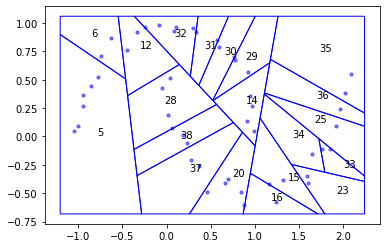

In [18]:
Plot.plot2D_partitioning(m,part)

### PLOT OF THE SPACE CLASSIFICATION FOR 2, 3 AND 6 NUMBER OF CLUSTERS

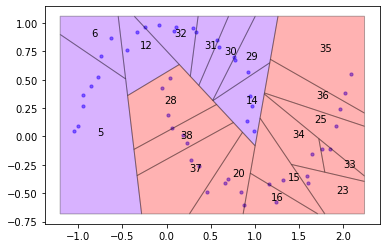

In [19]:
number_of_clusters = 2
Plot.plot2D_merging(m,part,list_p,number_of_clusters)

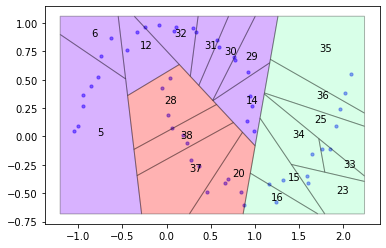

In [20]:
number_of_clusters = 3
Plot.plot2D_merging(m,part,list_p,number_of_clusters)

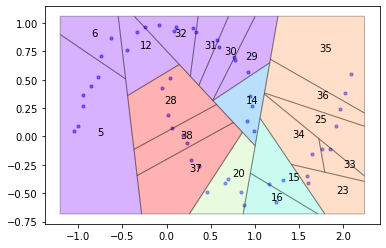

In [21]:
number_of_clusters = 6
Plot.plot2D_merging(m,part,list_p,number_of_clusters)

In [ ]:
import sys
print(sys.getsizeof(df))

In [ ]:
import time
start = time.perf_counter()
funzione
end = time.perf_counter()
print(end - start)